In [1]:
from datetime import datetime

# runtime
import timeit

# Data Manipulation
import numpy as np
import pandas as pd

# Viz
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv(r"/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv", sep=';')
df.shape

(41188, 21)

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
34752,48,services,single,basic.4y,unknown,yes,yes,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
10052,46,blue-collar,married,professional.course,unknown,no,no,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,no
23030,40,technician,divorced,professional.course,no,yes,no,cellular,aug,tue,...,8,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
8856,37,services,married,high.school,unknown,no,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
29749,32,admin.,single,university.degree,no,yes,no,cellular,apr,mon,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.duplicated().sum()

12

In [9]:
df.drop_duplicates(keep = 'first', inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.columns = df.columns.str.replace(".", "_")
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [13]:
df.describe(include= "O").T


,count,unique,top,freq
job,41176,12,admin.,10419
marital,41176,4,married,24921
education,41176,8,university.degree,12164
default,41176,3,no,32577
housing,41176,3,yes,21571
loan,41176,3,no,33938
contact,41176,2,cellular,26135
month,41176,10,may,13767
day_of_week,41176,5,thu,8618
poutcome,41176,3,nonexistent,35551


In [14]:
def is_contacted_before(x):
    if x == 999:
        return 0
    else:
        return 1

In [15]:
df['contacted_before'] = df['pdays'].apply(is_contacted_before)

In [16]:
df.drop('pdays', axis=1, inplace=True)


In [17]:
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = df[df['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = df[df['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()


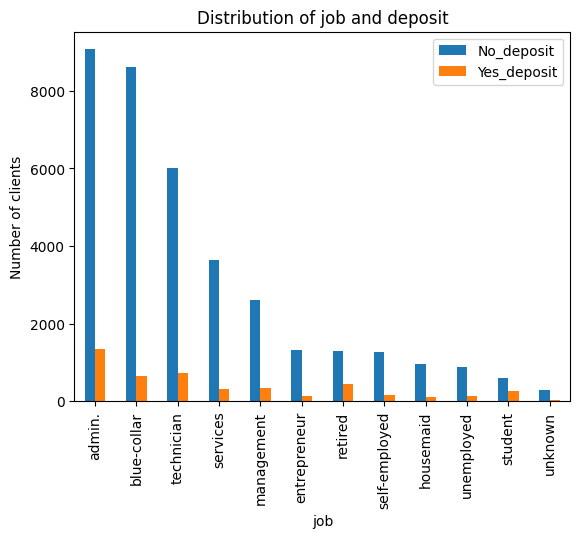

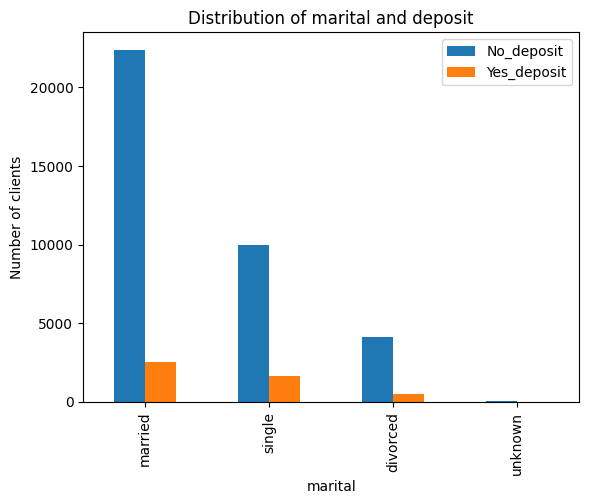

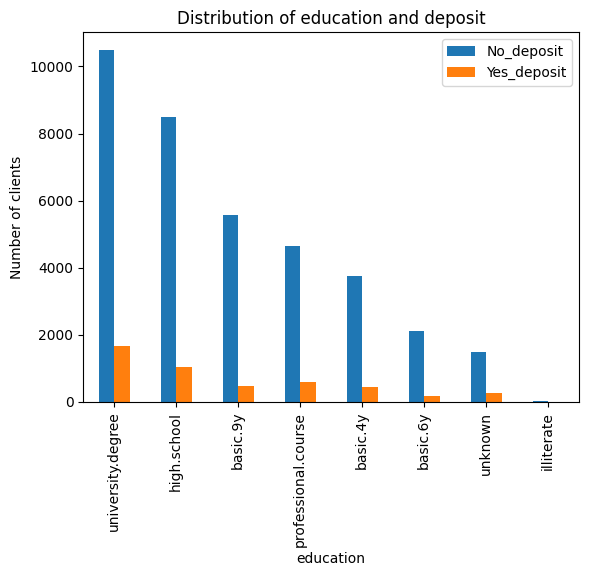

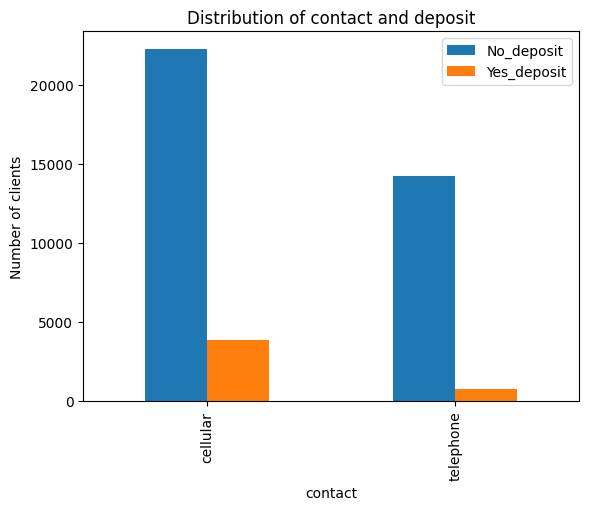

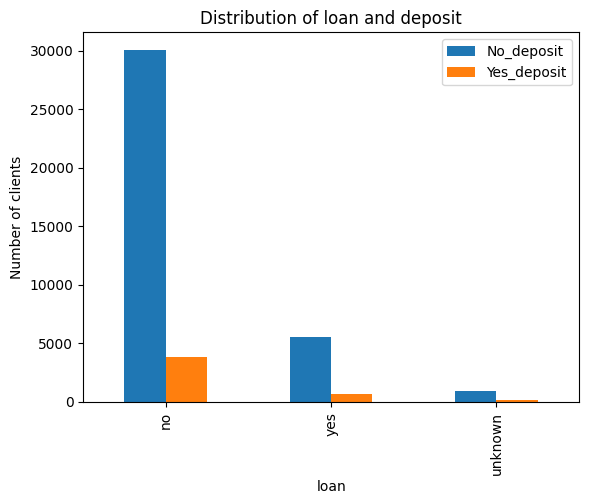

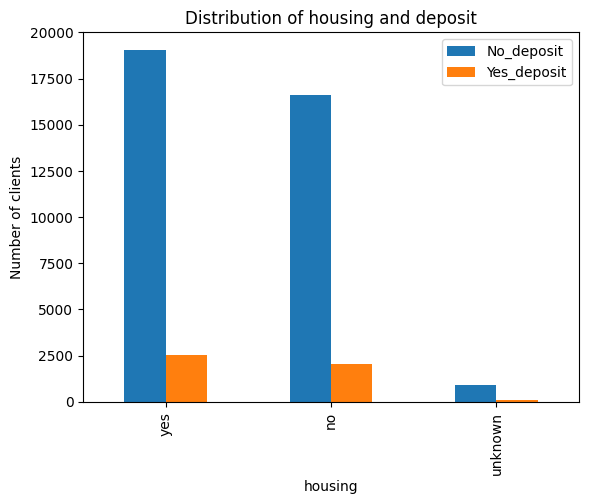

(None, None, None, None, None, None)

In [18]:
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing')

<Axes: >

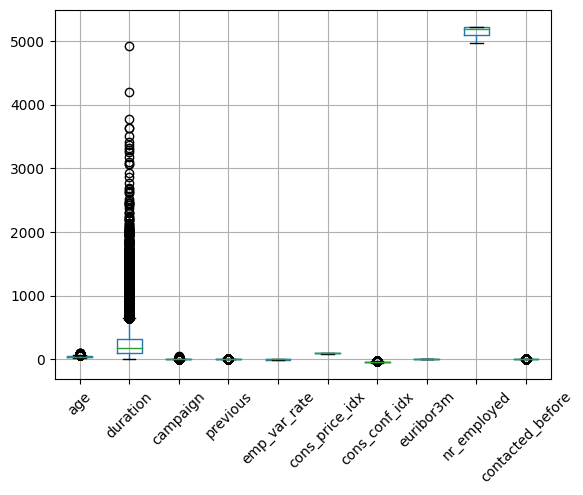

In [19]:
df.boxplot( rot=45)

In [20]:
numbers = df.select_dtypes(['int64', 'float64']).columns.to_list()

In [21]:
numbers

['age',
 'duration',
 'campaign',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'contacted_before']

<Axes: >

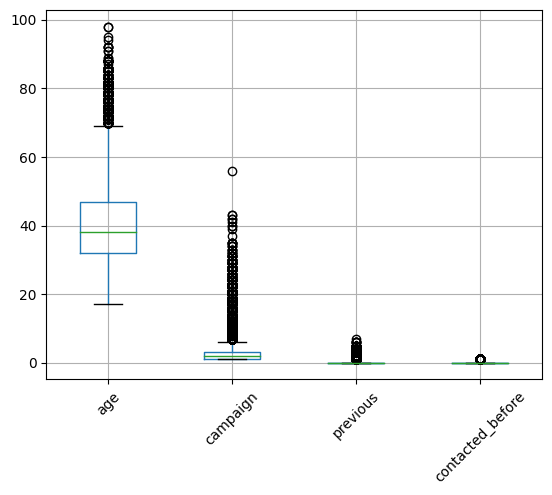

In [22]:
df[['age',
 'campaign',
 'previous',
 'contacted_before']].boxplot(rot=45)

In [23]:
for cols in ['age', 'duration', 'campaign']:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (df[cols] >= Q1 - 1.5 * IQR) & (df[cols] <= Q3 + 1.5 *IQR)
    df=df.loc[filter]

<Axes: >

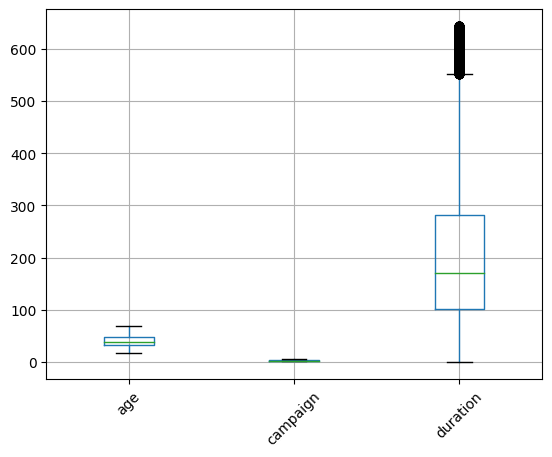

In [24]:
df[['age',
 'campaign',
 'duration']].boxplot(rot=45)

In [25]:
df.describe()

,age,duration,campaign,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,contacted_before
count,35524.000000,35524.000000,35524.000000,35524.000000,35524.000000,35524.000000,35524.000000,35524.000000,35524.000000,35524.000000
mean,39.599961,206.812043,2.044195,0.175008,0.064948,93.566412,-40.523094,3.609190,5166.691245,0.035694
std,9.678592,140.082035,1.284235,0.493375,1.567057,0.577002,4.623744,1.731433,71.495359,0.185529
min,17.000000,0.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,101.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,170.000000,2.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,281.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,69.000000,644.000000,6.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


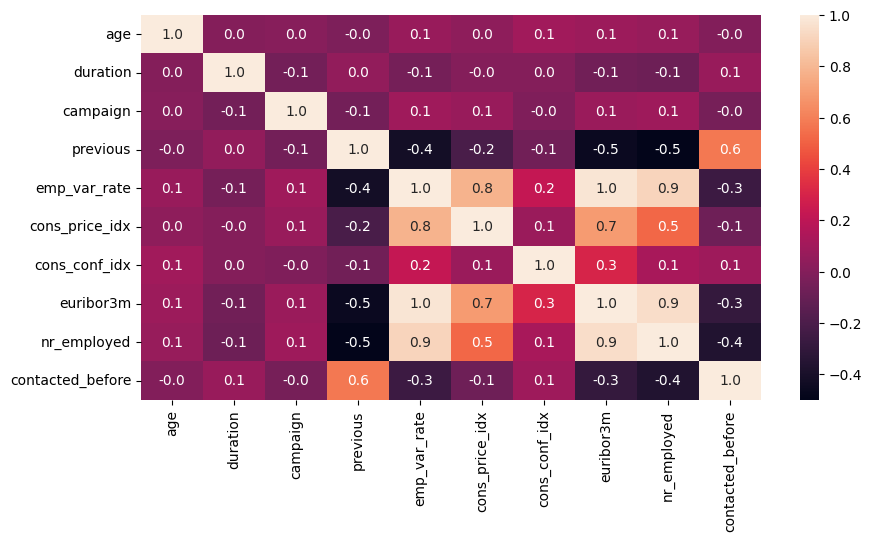

In [26]:
f,ax=plt.subplots(figsize=(10,5))
sns.heatmap(df[numbers].corr(),annot=True,fmt=".1f",ax=ax)
plt.show()

In [27]:
df['y'] = (df.y == 'yes').astype('int')
df["y"].value_counts()

y
0    32651
1     2873
Name: count, dtype: int64

In [28]:
ed=['basic.9y','basic.6y','basic.4y']
for i in ed:
    df.loc[df['education'] == i, 'education'] = "middle.school"

df['education'].value_counts()

education
middle.school          10678
university.degree      10548
high.school             8278
professional.course     4548
unknown                 1458
illiterate                14
Name: count, dtype: int64

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,contacted_before
0,56,housemaid,married,middle.school,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,middle.school,no,no,no,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


In [30]:
df["month"].value_counts()

month
may    12157
jul     5876
aug     5315
jun     4507
nov     3706
apr     2305
oct      594
mar      467
sep      459
dec      138
Name: count, dtype: int64

In [31]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
df['month']= df['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
df['day_of_week']= df['day_of_week'].map(day_dict) 

In [32]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,contacted_before
0,56,housemaid,married,middle.school,no,no,no,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,middle.school,no,no,no,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


In [33]:
dictionary={'yes':1,'no':0,'unknown':-1}
df['housing']=df['housing'].map(dictionary)
df['default']=df['default'].map(dictionary)
df['loan']=df['loan'].map(dictionary)

In [34]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,contacted_before
0,56,housemaid,married,middle.school,0,0,0,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,-1,0,0,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,0,1,0,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,middle.school,0,0,0,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,0,0,1,telephone,5,2,...,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


In [35]:
df.contact = df.contact.map({'cellular': 1, 'telephone': 0})
df.poutcome = df.poutcome.map({'nonexistent':0, 'failure':0, 'success':1})

In [36]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,contacted_before
0,56,housemaid,married,middle.school,0,0,0,0,5,2,...,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,-1,0,0,0,5,2,...,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,0,1,0,0,5,2,...,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,middle.school,0,0,0,0,5,2,...,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,0,0,1,0,5,2,...,1,0,0,1.1,93.994,-36.4,4.857,5191.0,0,0


In [37]:
df = pd.get_dummies(df)
df.columns

Index(['age', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'contacted_before', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_middle.school', 'education_professional.course',
       'education_university.degree', 'education_unknown'],
      dtype='object')

In [38]:
df.head()

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_middle.school,education_professional.course,education_university.degree,education_unknown
0,56,0,0,0,0,5,2,261,1,0,...,False,True,False,False,False,False,True,False,False,False
1,57,-1,0,0,0,5,2,149,1,0,...,False,True,False,False,True,False,False,False,False,False
2,37,0,1,0,0,5,2,226,1,0,...,False,True,False,False,True,False,False,False,False,False
3,40,0,0,0,0,5,2,151,1,0,...,False,True,False,False,False,False,True,False,False,False
4,56,0,0,1,0,5,2,307,1,0,...,False,True,False,False,True,False,False,False,False,False


In [39]:
df.y.value_counts()

y
0    32651
1     2873
Name: count, dtype: int64

In [40]:
x=df.drop(['y'],axis=1)
y=df['y']

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
x, y = smote.fit_resample(x, y)

In [42]:
y.value_counts()

y
0    32651
1    32651
Name: count, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGB Classifier" :XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)

    # Accuracy: {score * 100:.2f}%")
    print(f"{name}:")
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print("Precision Score: ",precision_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print()

Logistic Regression:
Accuracy Score:  0.9531429446443611
Precision Score:  0.9643977415307403
[[6300  227]
 [ 385 6149]]

Decision Tree:
Accuracy Score:  0.9457162544981241
Precision Score:  0.9385634693570245
[[6119  408]
 [ 301 6233]]

Gradient Boosting Classifier:
Accuracy Score:  0.94778347752852
Precision Score:  0.9354166666666667
[[6093  434]
 [ 248 6286]]

XGB Classifier:
Accuracy Score:  0.965929101906439
Precision Score:  0.9620579754135681
[[6277  250]
 [ 195 6339]]

K-Nearest Neighbors:
Accuracy Score:  0.9542148380675293
Precision Score:  0.9479323875641412
[[6182  345]
 [ 253 6281]]

Random Forest Classifier:
Accuracy Score:  0.9675369420411913
Precision Score:  0.9580209895052474
[[6247  280]
 [ 144 6390]]

Ada Boost Classifier:
Accuracy Score:  0.943725595283669
Precision Score:  0.9412570385025111
[[6141  386]
 [ 349 6185]]



We have best accuracy Score: 96% and best precision Score: 97% with XGB Classifier.